In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model
import matplotlib as mpl

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
a = np.arange(2000,2018)
pop = [str(i)+'Pop' for i in a]
investment = [str(i)+'总投资金额(M)' for i in a]
inv_times = [str(i)+'总投资次数' for i in a]
gdp = [str(i)+'GDP' for i in a]
city=data['City'].drop_duplicates().values###获取城市
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题

In [46]:
### 获得双对数的值 ，舍掉双对数中的0值###
def avglogZipfM(inv,g,DATA,i):###读取两属性均存在的数据，将两两属性均存在数据的城市保存下来
    y_investment=np.log10(DATA[inv[i]])###当年数据
    y_gdp=np.log10(DATA[g[i]])
    y_investment2=y_investment.fillna(np.infty)
    y_gdp2=y_gdp.fillna(np.infty)
    x1=[]###保存两属性均存在的城市的当年的数据
    y1=[]
    X1=[]###保存两属性均存在的城市的当年的原数据
    Y1=[]
    CITY=[]###保存两属性均存在的城市名
    for xi in range(len(y_investment2)):
        if y_investment2[xi]==-float('Inf') or y_investment2[xi]==float('Inf') or y_gdp2[xi]==-float('Inf') or y_gdp2[xi]==float('Inf'):
#             print('inf...')
            continue
#         elif xi>-4:
        else:
            x1.append(y_investment2[xi])
            y1.append(y_gdp2[xi])
            X1.append(DATA[inv[i]][xi])
            Y1.append(DATA[g[i]][xi])
            CITY.append(city[xi])
    cp=dict(zip(CITY,y1))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y11 = [cpSortList[i][1] for i in range(len(cpSortList))]
    x11 = np.log10(np.arange(1,len(y11)+1))
    return(x11,y11,CITY,X1,Y1)

In [47]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH(Yt1,Yt2,num):
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)


In [61]:
# #### Amount 均值
# fig=plt.figure(figsize=(9,7))
# zip_Ax=[]###保存所有城市17年间的数值
# zip_Tx=[]
# zip_Gx=[]
# zip_Ay=[]###保存所有城市17年间的数值
# zip_Ty=[]
# zip_Gy=[]
# ###设置颜色
# cm1 = list(sns.color_palette("Blues", 18))###蓝色

# # plt.figure(figsize=(27,14))
# # plt.subplot(231)
# font2 = {'family' : 'Arial',
#     'weight' : 'normal',
#     'size' : 22,
#     }###设置横纵坐标的字体格式
#     #设定X,Y轴标签和title
# plt.tick_params(labelsize=16) #刻度字体大小13
# for i in range(len(inv_times)):
# #     YT_A = avglogZipfM(data,investment,'amount',i)
#     YT_A = avglogZipfM(pop,investment,data,i)
#     zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
#     zip_Ay.extend(YT_A[1])
#     plt.plot(YT_A[0],YT_A[1],color=cm1[i])
# nh_A = picNH(zip_Ax,zip_Ay)###得到拟合结果
# plt.plot(nh_A[1],nh_A[2],color='blue',linewidth=3)
# plt.text(-0.2, 1.37, 'slope = {}'.format("%.2f" % nh_A[0]),size=16)
# plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
# plt.ylabel('$\log_{10}$'+' (amount'+'/'+r'$\langle {} \rangle$'.format('amount')+')',font2)

# cmap = mpl.cm.Blues###画颜色条
# ax1 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
# norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
# bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
# cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
#     norm=norm,
#     boundaries= [2001] + bounds + [2018],
#     extend='both',
#     ticks=bounds,  # optional
#     spacing='proportional',
#     orientation='vertical')
# # plt.savefig('E:/vcdata/pic/picSC/Fig5_a(zipfAmount).pdf', bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher

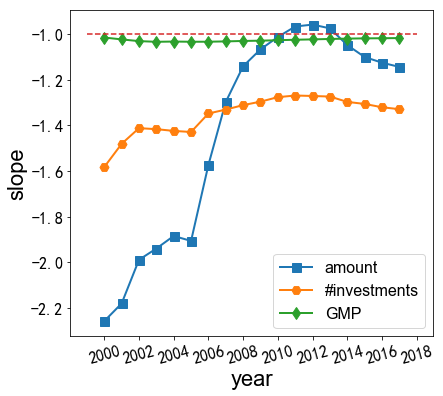

In [49]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
fig=plt.figure(figsize=(6.5,6))
ax1=fig.add_subplot(111)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = avglogZipfM(pop,investment,data,i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    if i<6:
        nhA.append(picNH(zip_Ax,zip_Ay,1.4)[0])
    else:
        nhA.append(picNH(zip_Ax,zip_Ay,1.9)[0])
    
    YT_T=avglogZipfM(pop,inv_times,data,i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    if i<6:
        nhT.append(picNH(zip_Tx,zip_Ty,1.0)[0])
    else:
        nhT.append(picNH(zip_Tx,zip_Ty,1.5)[0])
    
    YT_G=avglogZipfM(pop,gdp,data,i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH(zip_Gx,zip_Gy,2.3)[0])
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)###设置刻度
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=15)
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.plot(np.arange(1999,2019),[-1]*(len(x)+2),'--')
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope原始).pdf', bbox_inches='tight')

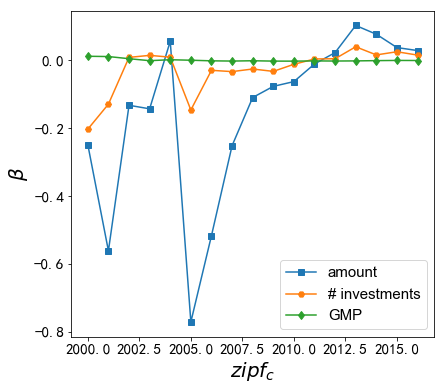

In [57]:
##############################################
########查看zipf变化情况 #####################
deltaAzipf = []
deltaTzipf = []
deltaGzipf = []
for i in range(len(nhA)-1):
    deltaAzipf.append(pow(1,nhA[i+1])/pow(2,nhA[i+1])-pow(1,nhA[i])/pow(2,nhA[i]))
    deltaTzipf.append(pow(1,nhT[i+1])/pow(2,nhT[i+1])-pow(1,nhT[i])/pow(2,nhT[i]))
    deltaGzipf.append(pow(1,nhG[i+1])/pow(2,nhG[i+1])-pow(1,nhG[i])/pow(2,nhG[i]))

### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.plot(year,deltaAzipf,label='amount',marker='s')
plt.plot(year,deltaTzipf,label='# investments',marker='H')
plt.plot(year,deltaGzipf,label='GMP',marker='d')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
# plt.axhline(y=1, color='black', linestyle='-')
# plt.axvline(x=1, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

In [58]:
dfzipf = pd.read_excel('E:/vcdata/pic/picSC/zipfClass11.xlsx')
dfNH = pd.read_excel('E:/vcdata/pic/picSC/betaK.xlsx')#####记录按照质心拟合和城市标度律
dfzipfO = pd.read_excel('E:/vcdata/pic/picSC/zipflogorigalClass2.xlsx')
zipfAmount = dfzipf['zipfAmount']
zipfTimes = dfzipf['zipfTimes']
zipfGMP = dfzipf['zipfGMP']
zipfAmountOR = dfzipfO['nhA']
zipfTimesOR = dfzipfO['nhT']
zipfGMPOR = dfzipfO['nhG']
belt_A = dfNH['belt_A']
belt_T = dfNH['belt_T']
belt_G = dfNH['belt_G']
ALL_A = dfNH['ALL_A']
ALL_T = dfNH['ALL_T']
ALL_G = dfNH['ALL_G']
Dbelt_A = [belt_A[i+1]-belt_A[i] for i in range(len(belt_A)-1)]
Dbelt_T = [belt_T[i+1]-belt_T[i] for i in range(len(belt_T)-1)]
Dbelt_G = [belt_G[i+1]-belt_G[i] for i in range(len(belt_G)-1)]
DALL_A = [ALL_A[i+1]-ALL_A[i] for i in range(len(ALL_A)-1)]
DALL_T = [ALL_T[i+1]-ALL_T[i] for i in range(len(ALL_T)-1)]
DALL_G = [ALL_G[i+1]-ALL_G[i] for i in range(len(ALL_G)-1)]

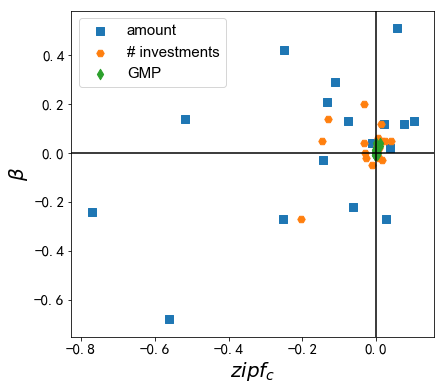

In [59]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(deltaAzipf,DALL_A,label='amount',marker='s',s=55)
plt.scatter(deltaTzipf,DALL_T,label='# investments',marker='H',s=55)
plt.scatter(deltaGzipf,DALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

In [ ]:
###############归一化后的zipf #############


In [56]:
pow(1,-0.8)/pow(2,-0.8),pow(1,-0.9)/pow(2,-0.9),pow(1,-1.28)/pow(2,-1.28),pow(1,-1.48)/pow(2,-1.48),

(1.7411011265922485, 1.8660659830736148, 2.428389768790094, 2.789487332700811)

In [62]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH2(Yt1,Yt2):
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        else:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)


D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher

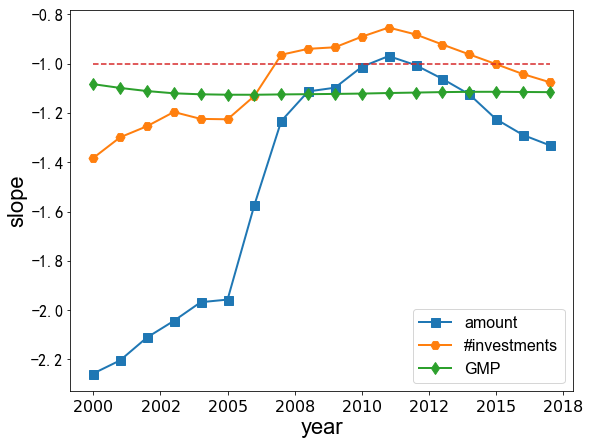

In [80]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % x
fig=plt.figure(figsize=(9,7))
ax1=fig.add_subplot(111)
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = avglogZipfM(pop,investment,data,i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    nhA.append(picNH2(zip_Ax,zip_Ay)[0])
    
    YT_T=YT_A = avglogZipfM(pop,inv_times,data,i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    nhT.append(picNH2(zip_Tx,zip_Ty)[0])
    
    YT_G=YT_A = avglogZipfM(pop,gdp,data,i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH2(zip_Gx,zip_Gy)[0])
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.legend(prop=font1)
plt.plot(x,[-1]*len(x),'--')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope).pdf', bbox_inches='tight')

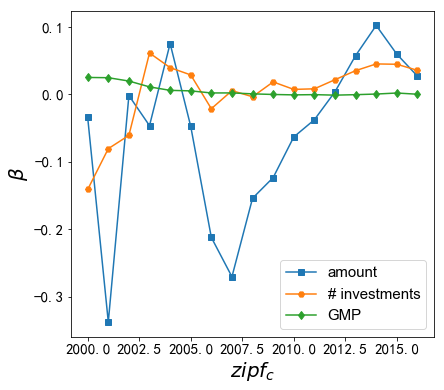

In [79]:
##############################################
########查看zipf变化情况 #####################
deltaAzipf = []
deltaTzipf = []
deltaGzipf = []
for i in range(len(nhA)-1):
    deltaAzipf.append(pow(1,nhA[i+1])/pow(2,nhA[i+1])-pow(1,nhA[i])/pow(2,nhA[i]))
    deltaTzipf.append(pow(1,nhT[i+1])/pow(2,nhT[i+1])-pow(1,nhT[i])/pow(2,nhT[i]))
    deltaGzipf.append(pow(1,nhG[i+1])/pow(2,nhG[i+1])-pow(1,nhG[i])/pow(2,nhG[i]))

### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.plot(year,deltaAzipf,label='amount',marker='s')
plt.plot(year,deltaTzipf,label='# investments',marker='H')
plt.plot(year,deltaGzipf,label='GMP',marker='d')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
# plt.axhline(y=1, color='black', linestyle='-')
# plt.axvline(x=1, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

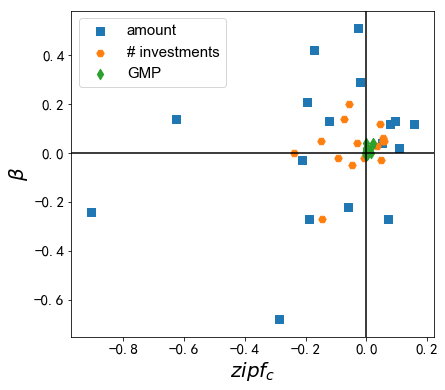

In [65]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(deltaAzipf,DALL_A,label='amount',marker='s',s=55)
plt.scatter(deltaTzipf,DALL_T,label='# investments',marker='H',s=55)
plt.scatter(deltaGzipf,DALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

In [41]:
### 将zipf拟合值保存下来，跟scaling law做对比
dfzipf = pd.DataFrame()
dfzipf['zipfAmount'] = nhA
dfzipf['zipfTimes'] = nhT
dfzipf['zipfGMP'] = nhG
dfzipf.to_excel('E:/vcdata/pic/picSC/zipfClass11.xlsx')

In [ ]:
############# 归一化处理#################

In [70]:
### 获得双对数的值 ，舍掉双对数中的0值###
def GYlogZipfM(inv,g,DATA,i):###读取两属性均存在的数据，将两两属性均存在数据的城市保存下来
    y_investment=np.log10(DATA[inv[i]])###当年数据
    y_gdp=np.log10(DATA[g[i]])
    y_investment2=y_investment.fillna(np.infty)
    y_gdp2=y_gdp.fillna(np.infty)
    x1=[]###保存两属性均存在的城市的当年的数据
    y1=[]
    X1=[]###保存两属性均存在的城市的当年的原数据
    Y1=[]
    CITY=[]###保存两属性均存在的城市名
    for xi in range(len(y_investment2)):
        if y_investment2[xi]==-float('Inf') or y_investment2[xi]==float('Inf') or y_gdp2[xi]==-float('Inf') or y_gdp2[xi]==float('Inf'):
#             print('inf...')
            continue
#         elif xi>-4:
        else:
            x1.append(y_investment2[xi])
            y1.append(y_gdp2[xi])
            X1.append(DATA[inv[i]][xi])
            Y1.append(DATA[g[i]][xi])
            CITY.append(city[xi])
    cp=dict(zip(CITY,np.log10(Y1/np.mean(Y1))))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y11 = [cpSortList[i][1] for i in range(len(cpSortList))]
    kk = np.arange(1,len(y11)+1)
    x11 = np.log10(kk/np.mean(kk))
    return(x11,y11,CITY,X1,Y1)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


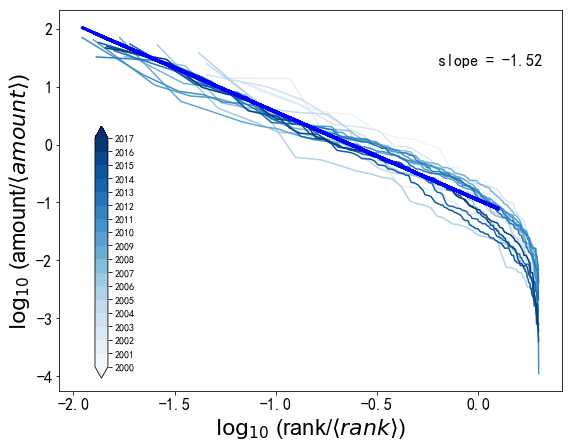

In [75]:
#### Amount 均值
fig=plt.figure(figsize=(9,7))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
###设置颜色
cm1 = list(sns.color_palette("Blues", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
#     YT_A = avglogZipfM(data,investment,'amount',i)
    YT_A = GYlogZipfM(pop,investment,data,i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    plt.plot(YT_A[0],YT_A[1],color=cm1[i])
nh_A = picNH(zip_Ax,zip_Ay,0.1)###得到拟合结果
plt.plot(nh_A[1],nh_A[2],color='blue',linewidth=3)
plt.text(-0.2, 1.37, 'slope = {}'.format("%.2f" % nh_A[0]),size=16)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
plt.ylabel('$\log_{10}$'+' (amount'+'/'+r'$\langle {} \rangle$'.format('amount')+')',font2)

cmap = mpl.cm.Blues###画颜色条
ax1 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_a(zipfAmount).pdf', bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher

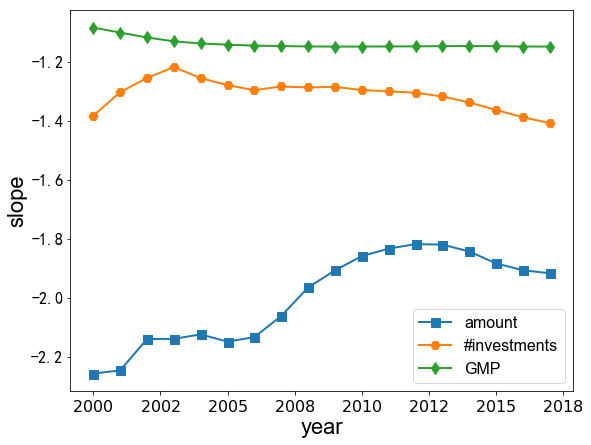

In [76]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % x
fig=plt.figure(figsize=(9,7))
ax1=fig.add_subplot(111)
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = GYlogZipfM(pop,investment,data,i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    nhA.append(picNH2(zip_Ax,zip_Ay)[0])
    
    YT_T=YT_A = GYlogZipfM(pop,inv_times,data,i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    nhT.append(picNH2(zip_Tx,zip_Ty)[0])
    
    YT_G=YT_A = GYlogZipfM(pop,gdp,data,i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH2(zip_Gx,zip_Gy)[0])
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope).pdf', bbox_inches='tight')